#### Cho bộ dữ liệu

X = [1, 2, 3, 4]
Y = [2, 1, 1, 3]

#### Hồi quy tuyến tính

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([[1],
              [2],
              [3],
              [4]])

Y = np.array([[2],
              [1],
              [1],
              [3]])

In [4]:
W1 = np.random.rand(1, 3)
W1

array([[0.46872004, 0.41680188, 0.09322462]])

In [5]:
b1 = np.random.rand(3, 1)
b1

array([[0.05798209],
       [0.64267243],
       [0.99234329]])

In [6]:

W2 = np.random.rand(3, 4)
W2

array([[0.25346941, 0.76929693, 0.00163599, 0.66328197],
       [0.74984108, 0.31663392, 0.73914843, 0.54185757],
       [0.84284313, 0.53349362, 0.45628981, 0.39209306]])

In [7]:
b2 = np.random.rand(4, 1)
b2

array([[0.13599714],
       [0.49542318],
       [0.70374196],
       [0.18253888]])

In [8]:
W3 = np.random.rand(4, 1)
W3

array([[0.1053232 ],
       [0.69375321],
       [0.44216425],
       [0.10415669]])

In [18]:
b3 = np.random.rand(1, 1)
b3

array([[0.1341885]])

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

### Lan truyền xuôi

In [20]:
Z1 = X.dot(W1) + b1.T
Z1

array([[17.71966571,  3.28814888, 18.23707664],
       [30.36160065,  5.23440586, 31.20592614],
       [43.00353559,  7.18066284, 44.17477563],
       [55.64547053,  9.12691982, 57.14362512]])

In [21]:
H1 = sigmoid(Z1)
H1

array([[0.99999998, 0.96402   , 0.99999999],
       [1.        , 0.99469827, 1.        ],
       [1.        , 0.99923942, 1.        ],
       [1.        , 0.99989131, 1.        ]])

In [22]:
Z2 = H1.dot(W2) + b2.T
Z2

array([[-16.97422822, -15.45676193, -21.69468565, -15.82862481],
       [-17.08227092, -15.5518161 , -21.77232967, -15.89520427],
       [-17.09826391, -15.56588647, -21.7838229 , -15.90505968],
       [-17.10055976, -15.56790631, -21.78547279, -15.90647445]])

In [23]:
H2 = sigmoid(Z2)
H2

array([[4.24801783e-08, 1.93737415e-07, 3.78545192e-10, 1.33572031e-07],
       [3.81297523e-08, 1.76170022e-07, 3.50265502e-10, 1.24968467e-07],
       [3.75247939e-08, 1.73708603e-07, 3.46262867e-10, 1.23742901e-07],
       [3.74387416e-08, 1.73358092e-07, 3.45692043e-10, 1.23567957e-07]])

In [24]:
Y_pred = H2.dot(W3) + b3.T
Y_pred

array([[0.13417999, 0.13418085, 0.13417996, 0.13418428],
       [0.13418067, 0.13418146, 0.13418063, 0.13418465],
       [0.13418077, 0.13418154, 0.13418073, 0.1341847 ],
       [0.13418078, 0.13418155, 0.13418074, 0.1341847 ]])

In [30]:
J = np.linalg.norm(Y_pred - Y)**2 / len(Y)
J

np.float64(13.193474636004138)

### Lan truyền ngược

In [31]:
gradient_J_Y_pred = 2/len(Y) * (Y_pred - Y)
gradient_J_Y_pred

array([[-0.93291001, -0.93290957, -0.93291002, -0.93290786],
       [-0.43290966, -0.43290927, -0.43290968, -0.43290768],
       [-0.43290962, -0.43290923, -0.43290964, -0.43290765],
       [-1.43290961, -1.43290922, -1.43290963, -1.43290765]])

In [32]:
gradient_J_H2 = gradient_J_Y_pred.dot(W3.T)
gradient_J_H2

array([[ 56.69280725,  65.78060582,  82.97980539,  88.39183498],
       [ 26.30784319,  30.52496397,  38.50611708,  41.01753424],
       [ 26.30784064,  30.524961  ,  38.50611329,  41.01753004],
       [ 87.07773225, 101.03620214, 127.45343555, 135.76607117]])

In [33]:
gradient_J_W3 = H2.T.dot(gradient_J_H2)
gradient_J_b3 = gradient_J_W3.T.dot(np.ones(shape=(len(Y), 1)))

gradient_J_W3, gradient_J_b3

(array([[7.65870912e-06, 8.88639231e-06, 1.12098558e-05, 1.19409745e-05],
        [3.52836990e-05, 4.09396397e-05, 5.16438440e-05, 5.50121104e-05],
        [6.98870270e-08, 8.10898455e-08, 1.02291847e-07, 1.08963429e-07],
        [2.48756503e-05, 2.88631914e-05, 3.64098504e-05, 3.87845395e-05]]),
 array([[6.78879454e-05],
        [7.87703132e-05],
        [9.93658421e-05],
        [1.05846588e-04]]))

In [34]:
gradient_J_Z2 = gradient_J_H2 * sigmoid_derivative(Z2)
gradient_J_Z2

array([[2.40832046e-06, 1.27441621e-05, 3.14116063e-08, 1.18066754e-05],
       [1.00311150e-06, 5.37758263e-06, 1.34873644e-08, 5.12589772e-06],
       [9.87196260e-07, 5.30244740e-06, 1.33332372e-08, 5.07562755e-06],
       [3.26008059e-06, 1.75154402e-05, 4.40596385e-08, 1.67763340e-05]])

In [35]:
gradient_J_H1 = gradient_J_Z2.dot(W2.T)
gradient_J_H1

array([[-9.02562106e-05, -7.36712092e-05, -1.18791922e-04],
       [-3.84951449e-05, -3.13533322e-05, -5.07425806e-05],
       [-3.80183388e-05, -3.09549931e-05, -5.01252977e-05],
       [-1.25614028e-04, -1.02271728e-04, -1.65621198e-04]])

In [36]:
gradient_J_W2 = H1.T.dot(gradient_J_Z2)
gradient_J_b2 = gradient_J_Z2.T.dot(np.ones(shape=(len(Y), 1)))

gradient_J_W2, gradient_J_b2

(array([[7.65870877e-06, 4.09396320e-05, 1.02291846e-07, 3.87845344e-05],
        [7.56563405e-06, 4.04466502e-05, 1.01075221e-07, 3.83268705e-05],
        [7.65870879e-06, 4.09396321e-05, 1.02291846e-07, 3.87845345e-05]]),
 array([[7.65870882e-06],
        [4.09396323e-05],
        [1.02291846e-07],
        [3.87845346e-05]]))

In [38]:
gradient_J_Z1 = gradient_J_H1 * sigmoid_derivative(Z1)
gradient_J_Z1

array([[-1.81938261e-12, -2.55531811e-06, -1.42733248e-12],
       [-2.51300593e-18, -1.65345677e-07, -1.41965665e-18],
       [-0.00000000e+00, -2.35259720e-08, -0.00000000e+00],
       [-0.00000000e+00, -1.11145086e-08, -0.00000000e+00]])

In [39]:
gradient_J_W1 = X.T.dot(gradient_J_Z1)
gradient_J_b1 = gradient_J_Z1.T.dot(np.ones(shape=(len(Y), 1)))

gradient_J_W1, gradient_J_b1

(array([[-1.81938763e-12, -3.00104542e-06, -1.42733532e-12]]),
 array([[-1.81938512e-12],
        [-2.75530427e-06],
        [-1.42733390e-12]]))

In [27]:
iter = 1000
tolerance = 1e-5
learning_rate = 0.1
step = 0
history = []

In [13]:
X = np.array([[1],
              [2],
              [3],
              [4]])

Y = np.array([[2],
              [1],
              [1],
              [3]])

W1 = np.random.rand(1, 3)
b1 = np.random.rand(3, 1)
W2 = np.random.rand(3, 4)
b2 = np.random.rand(4, 1)
W3 = np.random.rand(4, 1)
b3 = np.random.rand(1, 1)

while True:
    step += 1

    # Lan truyền tiến
    Z1 = X.dot(W1) + b1.T
    H1 = sigmoid(Z1)
    Z2 = H1.dot(W2) + b2.T
    H2 = sigmoid(Z2)
    Y_pred = H2.dot(W3) + b3.T
    J = np.linalg.norm(Y_pred - Y)**2 / len(Y)

    history.append(J)

    # Lan truyền ngược
    gradient_J_Y_pred = 2/len(Y) * (Y_pred - Y)

    gradient_J_H2 = gradient_J_Y_pred.dot(W3.T)
    gradient_J_W3 = H2.T.dot(gradient_J_H2)
    gradient_J_b3 = gradient_J_W3.T.dot(np.ones(shape=(len(Y), 1)))

    gradient_J_Z2 = gradient_J_H2 * sigmoid_derivative(Z2)
    gradient_J_H1 = gradient_J_Z2.dot(W2.T)
    gradient_J_W2 = H1.T.dot(gradient_J_Z2)
    gradient_J_b2 = gradient_J_Z2.T.dot(np.ones(shape=(len(Y), 1)))

    gradient_J_Z1 = gradient_J_H1 * sigmoid_derivative(Z1)
    gradient_J_W1 = X.T.dot(gradient_J_Z1)
    gradient_J_b1 = gradient_J_Z1.T.dot(np.ones(shape=(len(Y), 1)))


    W1 = W1 - learning_rate * gradient_J_W1
    b1 = b1 - learning_rate * gradient_J_b1

    W2 = W2 - learning_rate * gradient_J_W2
    b2 = b2 - learning_rate * gradient_J_b2

    W3 = W3 - learning_rate * gradient_J_W3
    b3 = b3 - learning_rate * gradient_J_b3

    if np.linalg.norm(gradient_J_W1) < tolerance and \
        np.linalg.norm(gradient_J_b1) < tolerance and \
        np.linalg.norm(gradient_J_W2) < tolerance and \
        np.linalg.norm(gradient_J_b2) < tolerance and \
        np.linalg.norm(gradient_J_W3) < tolerance and \
        np.linalg.norm(gradient_J_b3) < tolerance or \
        step >= iter:
        break



In [14]:
Y_pred

array([[-95.7702422 , -84.1217059 , -93.69242892, -51.73011465],
       [-95.77024152, -84.1217053 , -93.69242825, -51.73011428],
       [-95.77024142, -84.12170521, -93.69242816, -51.73011423],
       [-95.77024141, -84.1217052 , -93.69242814, -51.73011423]])

In [15]:
b3

array([[-95.77059085],
       [-84.12211444],
       [-93.69295148],
       [-51.73069875]])

In [16]:
b3

array([[-95.77059085],
       [-84.12211444],
       [-93.69295148],
       [-51.73069875]])

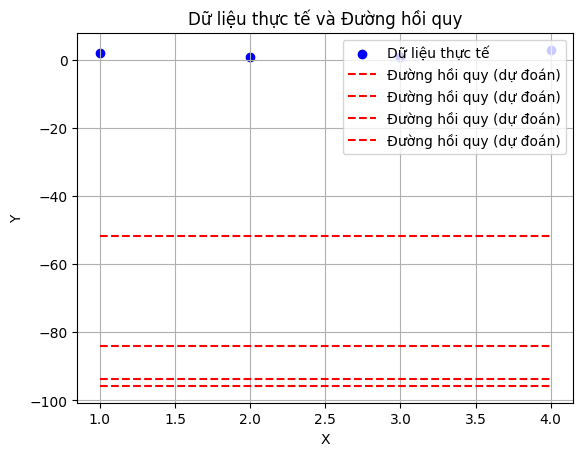

In [17]:
Z1 = X.dot(W1) + b1.T
H1 = sigmoid(Z1)
Z2 = H1.dot(W2) + b2.T
H2 = sigmoid(Z2)
Y_pred = H2.dot(W3) + b3.T

Y_pred

# Vẽ đồ thị dữ liệu thực tế và đường hồi quy
plt.scatter(X, Y, color='blue', label='Dữ liệu thực tế')  # Dữ liệu thực tế
plt.plot(X, Y_pred, color='red', label='Đường hồi quy (dự đoán)', linestyle='--')  # Đường hồi quy
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dữ liệu thực tế và Đường hồi quy')
plt.legend()
plt.grid(True)
plt.show()